In [20]:
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [21]:
train_dir = 'dataset/train'
val_dir = 'dataset/test'

In [22]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [24]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=24,
    color_mode="grayscale",
    class_mode='categorical',
)


Found 1968 images belonging to 41 classes.


In [25]:
test_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=6,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 492 images belonging to 41 classes.


In [26]:
model = Sequential()


In [27]:
model.add(Conv2D(32, (3, 3),
          activation='relu', input_shape=(128, 128, 1)))



In [28]:
model.add(MaxPooling2D(pool_size=(2, 2)))


In [29]:
model.add(Conv2D(32, (3, 3), padding="same",
          activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [30]:
model.add(Flatten())


In [31]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(64, activation='relu'))
model.add(Dense(41, activation='softmax'))

In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 63, 63, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 30752)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [34]:
history = model.fit(train_generator,
                    epochs=75,
                    validation_data=test_generator)


Epoch 1/75
82/82 [==============================] - 23s 262ms/step - loss: 3.7157 - accuracy: 0.0310 - val_loss: 3.6572 - val_accuracy: 0.0244
Epoch 2/75
82/82 [==============================] - 23s 276ms/step - loss: 3.4743 - accuracy: 0.0716 - val_loss: 2.6243 - val_accuracy: 0.3130
Epoch 3/75
82/82 [==============================] - 22s 271ms/step - loss: 2.5564 - accuracy: 0.2241 - val_loss: 1.4671 - val_accuracy: 0.5285
Epoch 4/75
82/82 [==============================] - 24s 294ms/step - loss: 1.9826 - accuracy: 0.3521 - val_loss: 1.0047 - val_accuracy: 0.6748
Epoch 5/75
82/82 [==============================] - 23s 283ms/step - loss: 1.6164 - accuracy: 0.4507 - val_loss: 0.7329 - val_accuracy: 0.7764
Epoch 6/75
82/82 [==============================] - 23s 275ms/step - loss: 1.3348 - accuracy: 0.5295 - val_loss: 0.6031 - val_accuracy: 0.7846
Epoch 7/75
82/82 [==============================] - 23s 281ms/step - loss: 1.2162 - accuracy: 0.5813 - val_loss: 0.5029 - val_accuracy: 0.8089

In [39]:
model_json = model.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
model.save_weights('model_updated.h5')
print('Weights saved')
model.save('yayy.h5')


Model Saved
Weights saved


In [40]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Visualizing loss

Text(0.5, 1.0, 'Loss Curves')

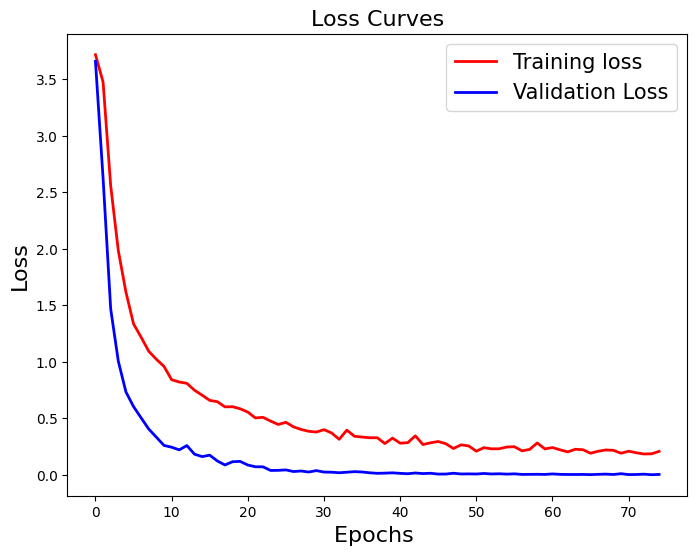

In [41]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['loss'], 'r', linewidth=2.0)
plt.plot(history.history['val_loss'], 'b', linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)


Visualizing accuracy

Text(0.5, 1.0, 'Accuracy Curves')

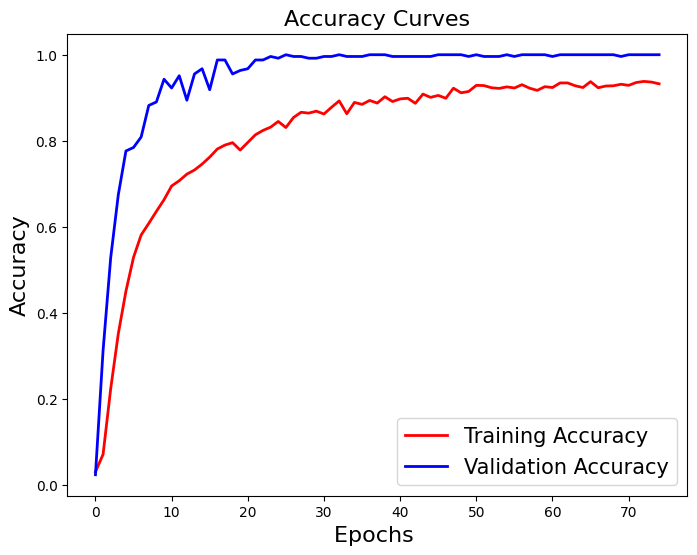

In [42]:
plt.figure(figsize=[8, 6])
plt.plot(history.history['accuracy'], 'r', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=15)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)
